In [ ]:
import sys
!{sys.executable} -m pip uninstall -q scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
pd.set_option("display.max_colwidth", 1000)

In [22]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

In [23]:
X

array([[-1.04948638,  0.8786438 ],
       [ 0.8780991 ,  0.89551051],
       [ 0.95928819,  1.03967316],
       [-1.18013412,  1.12062155],
       [-0.90731836,  1.06040861],
       [-0.62754626,  1.37661405],
       [ 0.82178321,  1.18947778],
       [-1.20376927,  0.78801845],
       [ 0.77151441,  0.345716  ],
       [-0.493857  ,  1.66752297],
       [ 1.17456965,  0.69211449],
       [ 0.82798737,  0.84806927],
       [ 0.89189141,  0.87699465],
       [ 0.90394545,  0.35413361],
       [ 0.94459507,  1.12641981],
       [ 0.9317172 ,  0.78344054],
       [-0.96853969,  1.27991386],
       [-1.09230828,  0.92686981],
       [-0.68243019,  1.4468218 ],
       [-0.76045809,  0.61363671],
       [-1.1146902 ,  1.13545112],
       [ 1.32970299,  1.58463774],
       [-1.39003042,  0.85771953],
       [ 1.01313574,  1.16777676],
       [ 1.22382712,  1.98519313],
       [-1.20257258,  0.69174373],
       [ 0.96435056,  1.77547698],
       [ 1.02600767,  0.87226739],
       [ 1.10863359,

<Axes: >

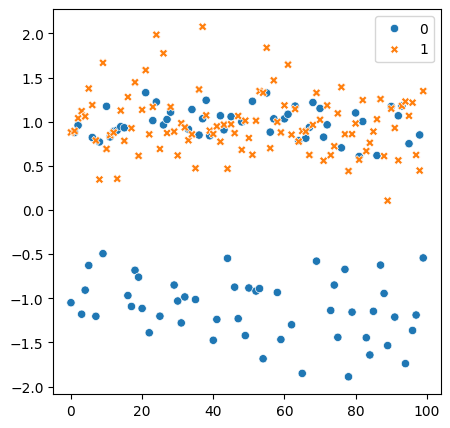

In [30]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=X)

### Logistic regression

In [36]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [37]:
def loss(y, y_hat):
    loss = -np.mean(y * np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return loss

In [38]:
def gradients(X, y, y_hat):
    m = X.shape[0]

    dw = (1/m) * np.dot(X.T, (y_hat-y)) 
    db = (1/m) * np.sum(y_hat-y)

    return dw, db

w.X + b =0 --- decision boundary

In [39]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

# x=np.array([[1,2],[3,4],[5,5],[6,2]])
# normalize(x)

In [60]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [61]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)

In [43]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

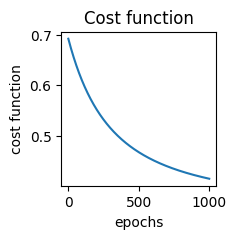

In [63]:
plt.figure(figsize=(2,2))
plt.plot(range(1000), l)
plt.title("Cost function")
plt.xlabel("epochs")
plt.ylabel("cost function")
plt.show()

In [64]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(3,3))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

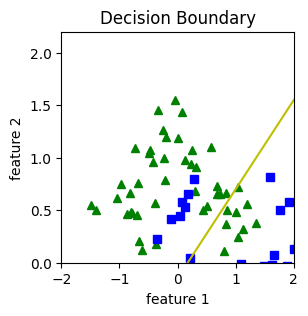

In [65]:
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [85]:
predict(np.array([[-1.04948638,  0.8786438 ]]))

/var/folders/xn/wq_cm5dd2lb275lzszpp0twm0000gn/T/ipykernel_3903/3073703642.py:11: RuntimeWarning: invalid value encountered in divide
  X = (X - X.mean(axis=0))/X.std(axis=0)


array([0])

In [71]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat)/len(y)
    return accuracy

accuracy(y, y_hat=predict(X))

0.81

### Non linear data

In [50]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

In [51]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)

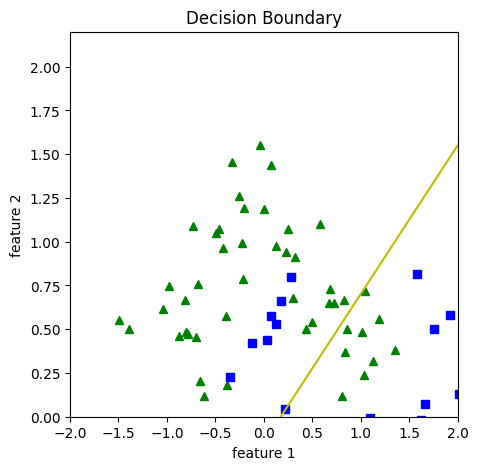

In [52]:
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [53]:
accuracy(y, predict(X))


0.81

### Using library

In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [78]:
lr.predict([[-1.04948638,  0.8786438 ]])

array([0])